# Create plot of frequencies of point totals by position

In [587]:
import pandas as pd

In [588]:
pos = ['QB','RB','WR','TE']

current_year = 2022

#for x in range(2010,current_year+1):
raw_df = pd.read_csv(f"../data/processed/pTotal.csv")

df_qb = raw_df.loc[raw_df['Pos'] == 'QB']
df_rb = raw_df.loc[raw_df['Pos'] == 'RB']
df_wr = raw_df.loc[raw_df['Pos'] == 'WR']
df_te = raw_df.loc[raw_df['Pos'] == 'TE']

df = pd.DataFrame(0, index=pos, columns=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

perc_qb = round(df_qb.Pts / 500,1)
perc_rb = round(df_rb.Pts / 500,1)
perc_wr = round(df_wr.Pts / 500,1)
perc_te = round(df_te.Pts / 500,1)

for ind in raw_df.index:
    total = 500
    if (raw_df.loc[ind].at['Pos'] == 'QB'):
        total = df_qb.Pts.max()
    if (raw_df.loc[ind].at['Pos'] == 'RB'):
        total = df_rb.Pts.max()
    if (raw_df.loc[ind].at['Pos'] == 'WR'):
        total = df_wr.Pts.max()
    if (raw_df.loc[ind].at['Pos'] == 'TE'):
        total = df_te.Pts.max()
    p = round((raw_df.loc[ind].at['Pts'])/total, 1)
    df.at[raw_df.loc[ind].at['Pos'],p] += 1

df.head()


,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
QB,361,141,80,60,70,83,94,43,29,11,2
RB,863,481,288,192,138,83,38,20,12,1,1
WR,829,609,382,291,233,150,89,46,14,4,1
TE,519,349,209,119,106,62,34,20,7,5,2


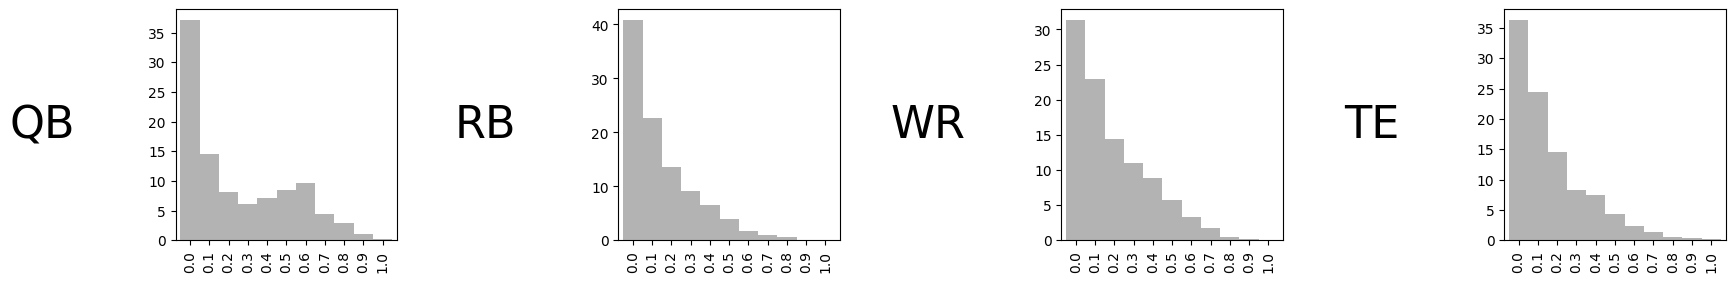

In [589]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_position(position, ax):
    positions = df.loc[position]
    positions = positions / positions.sum() * 100
    positions = positions[:10]
    ax.text(-0.6, 0.5, position, size=32,
            verticalalignment="center", horizontalalignment="center",
            transform=ax.transAxes)
    positions.plot.bar(ax=ax, width=1, color="0.7")
    
fig, axes = plt.subplots(ncols=4, figsize=(20, 3))

plt.subplots_adjust(wspace=1)
plot_position("QB", axes[0])
plot_position("RB", axes[1])
plot_position("WR", axes[2])
plot_position("TE", axes[3])

fig.savefig(f"../models/mTotal.png", bbox_inches="tight")